In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,mean_squared_log_error
import cv2
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [59]:
train=pd.read_csv('/content/drive/My Drive/Used_Electronics_Participants_Data/Used_Electronics_Participants_Data/Train.csv')
test=pd.read_csv('/content/drive/My Drive/Used_Electronics_Participants_Data/Used_Electronics_Participants_Data/Test.csv')
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   997 non-null    int64 
 1   Model_Info              997 non-null    object
 2   Additional_Description  997 non-null    object
 3   Locality                997 non-null    int64 
 4   City                    997 non-null    int64 
 5   State                   997 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 46.9+ KB


In [0]:
y=train['Price']
train=train.drop(['Price'],axis=1)
combined=pd.concat([train,test],axis=0)

In [0]:
combined.index=range(combined.shape[0])

In [7]:
combined

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0
...,...,...,...,...,...,...
3318,1,name0 7 32gb sale accessories,wife upgrading mobile 10100000 x 101009600 sp...,796,4,0
3319,1,name233 8 pro 6gb ram 128gb rom 1year old mobile,101004800 1010036800 1 month 12 days old 1010...,145,17,7
3320,0,name233 name2815 6 gb ram 128 gb rom blue 3 m...,10100105200 leeco 1010018400 10100221100 1010...,352,13,5
3321,1,name269 phone 6,phone best condition 101006600 device selling...,350,4,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   2326 non-null   int64 
 1   Model_Info              2326 non-null   object
 2   Additional_Description  2326 non-null   object
 3   Locality                2326 non-null   int64 
 4   City                    2326 non-null   int64 
 5   State                   2326 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 109.2+ KB


In [9]:
train['Brand'].unique()

array([1, 2, 0, 3])

In [0]:
a=train['Additional_Description'][0].split()

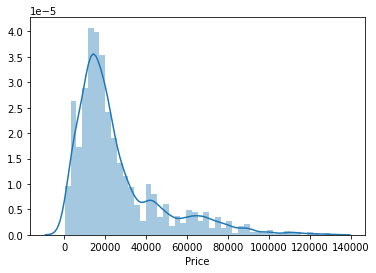

In [0]:
sns.distplot(train['Price'])
plt.show()

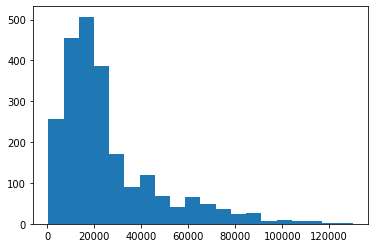

In [0]:
plt.hist(train['Price'],bins=20)
plt.show()

In [0]:
import re
import string

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
  p1=re.compile('\d+gb')
  p2=re.compile('\d+ gb')
  a=p1.findall(text)
  b=p2.findall(text)
  a=' '.join(a)
  b=' '.join(b)
  b=b.replace(' ','')
  text=re.sub('\w*\d+\w*','',text)
  text=re.sub('[''""...]','',text)
  text=re.sub('\n','',text)
  text=text+' '+a+' '+b
  text=re.sub(' gb ','',text)
  if text.isspace() is True:
    text='nothing' 
  return text
round1= lambda x:clean_text(x)

In [0]:
combined['Model_Info_clean']=combined['Model_Info'].apply(round1)
combined['Additional_Description_clean']=combined['Additional_Description'].apply(round1)


In [13]:
combined.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Model_Info_clean,Additional_Description_clean
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,space grey 64gb,old mobile number bill charger
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,phone new condition box accessories,nothing
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,x leess used good condition 256gb,seperate screen guard back cover proreleas...
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,plus space grey 64gb,without id colour xs using since genuinel...
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,phone sealed pack brand new factory outet pr...,xs max made warranty starts ₹ 64gb


In [14]:
train.isnull().sum()

Brand                     0
Model_Info                0
Additional_Description    0
Locality                  0
City                      0
State                     0
dtype: int64

In [15]:
train.Locality.unique().shape

(970,)

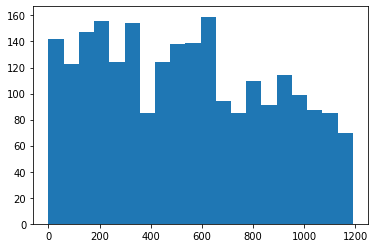

In [16]:
plt.hist(train['Locality'],bins=20)
plt.show()

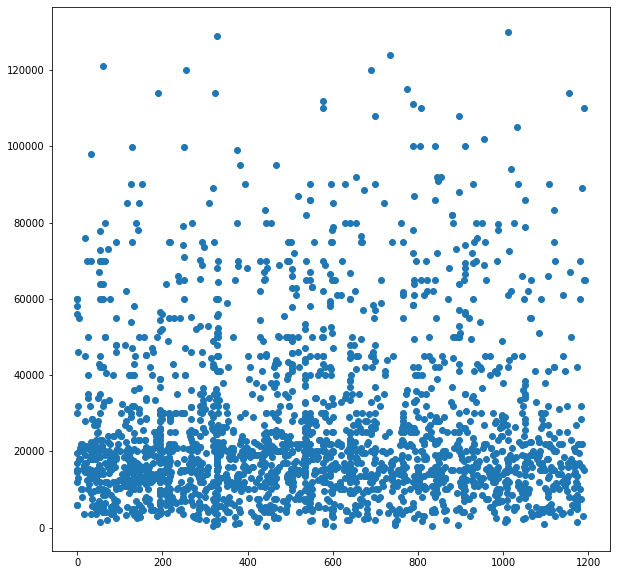

In [18]:
plt.rcParams['figure.figsize']=10,10
plt.scatter(train['Locality'],y)
plt.show()

In [0]:
train['City'].unique().shape

(16,)

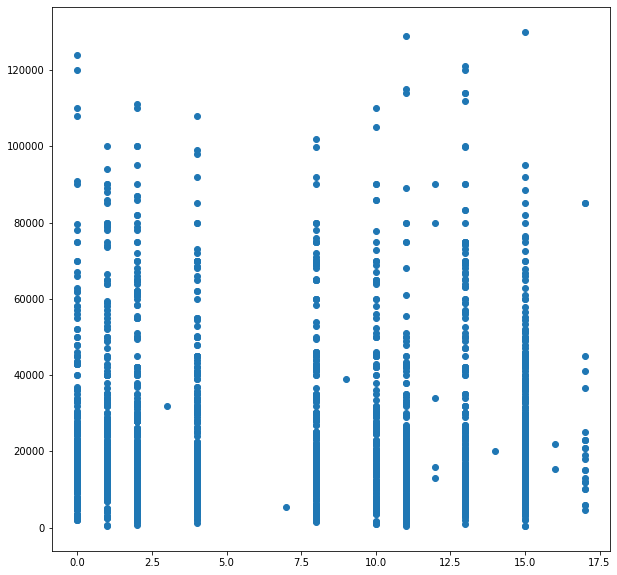

In [19]:
plt.scatter(train['City'],y)
plt.show()

In [20]:
train['State'].unique()

array([2, 0, 4, 7, 5, 6, 3, 1, 8])

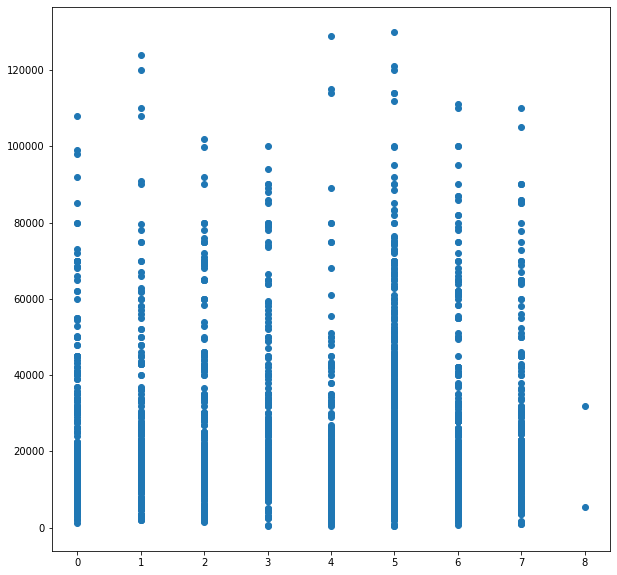

In [21]:
plt.scatter(train['State'],y)
plt.show()

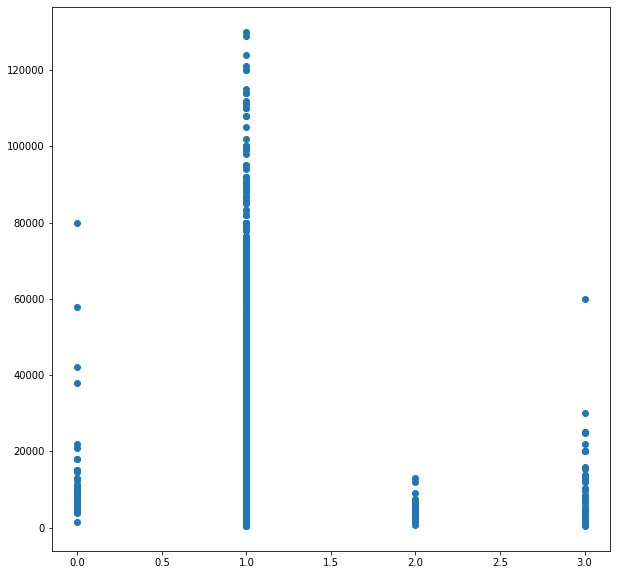

In [23]:
plt.scatter(train['Brand'],y)
plt.show()

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',max_features=50,analyzer='word')
dcmnt_term_mtx1=tfidf.fit_transform(combined['Model_Info_clean'])
data_dtm1=pd.DataFrame(dcmnt_term_mtx1.toarray(),columns=tfidf.get_feature_names())

#dcmnt_term_mtx2=tfidf.fit_transform(combined['Additional_Description_clean'])
#data_dtm2=pd.DataFrame(dcmnt_term_mtx2.toarray(),columns=tfidf.get_feature_names())

#combined_tfidf=pd.concat([data_dtm1,data_dtm2],axis=1)
combined_tfidf=data_dtm1
combined_tfidf.head()

,128gb,16gb,256gb,32gb,3gb,4gb,64gb,accessories,apple,available,best,black,box,brand,charger,cod,color,colour,condition,excellent,gold,good,grey,iphone,lg,max,mint,mobile,model,models,months,new,offer,old,pack,phone,plus,price,ram,red,rose,sale,sell,silver,space,used,warranty,xr,xs,year
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.352733,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.641179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.681520,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.528632,0.0,0.0,0.0,0.0,0.498466,0.000000,0.0,0.0,0.0,0.0,0.348312,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450254,0.0,0.0,0.000000,0.384747,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.467632,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.361756,0.0,0.0,0.516933,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.619058,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.320312,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.582246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.418782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.618879,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.434289,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396345,0.0,0.0,0.546784,0.338681,0.000000,0.490537,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [25]:
data_dtm2.head()

,128gb,32gb,4gb,64gb,accepted,accessories,available,battery,best,box,brand,camera,card,charger,condition,contact,description,display,excellent,exchange,fixed,good,interested,iphone,mobile,models,month,months,near,new,note,old,original,phone,plus,price,prices,profile,ram,sale,scratch,scratches,sell,selling,store,used,want,warranty,working,year
0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.5482,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.618915,0.0,0.0,0.0,0.0,0.0,0.0,0.562513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.63435,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.773046,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.00000,0.0,0.0,0.000000,0.0,0.648473,0.0,0.0,0.0,0.57744,0.0,0.0,0.0,0.0000,0.49603,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.00000,0.0,0.0,0.708174,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706038,0.0,0.0


In [90]:
combined_tfidf['Brand']=combined['Brand']
combined_tfidf.head()

,128gb,16gb,256gb,32gb,3gb,4gb,64gb,accessories,apple,available,best,black,box,brand,charger,cod,color,colour,condition,excellent,gold,good,grey,iphone,lg,max,mint,mobile,model,models,months,new,offer,old,pack,phone,plus,price,ram,red,rose,sale,sell,silver,space,used,warranty,xr,xs,year,Brand
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.352733,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.641179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.681520,0.000000,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.528632,0.0,0.0,0.0,0.0,0.498466,0.000000,0.0,0.0,0.0,0.0,0.348312,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450254,0.0,0.0,0.000000,0.384747,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.467632,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.361756,0.0,0.0,0.516933,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.619058,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.320312,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.582246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.418782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.618879,0.000000,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.434289,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.396345,0.0,0.0,0.546784,0.338681,0.000000,0.490537,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1


In [85]:
duplicate_columns = combined_tfidf.columns[combined_tfidf.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


In [0]:
combined_tfidf= combined_tfidf.loc[:,~combined_tfidf.columns.duplicated()]

In [49]:
duplicate_columns = combined_tfidf.columns[combined_tfidf.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


In [0]:
selected=range(2326)
x=combined_tfidf.loc[selected,:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
x_train.index=range(x_train.shape[0])
x_test.index=range(x_test.shape[0])

In [88]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1860, 50) (1860,) (466, 50) (466,)


In [92]:
from xgboost import XGBRegressor
eval_set=[(x_test,y_test)]
xgb=XGBRegressor(learning_rate=0.01,max_depth=7,min_child_weight=3,reg_lambda=1,gamma=3,n_estimators=500,colsample_bytree=0.8,objective='reg:squarederror')
xgb.fit(x_train,y_train,eval_set=eval_set,eval_metric='rmse',early_stopping_rounds=100)
predicted=xgb.predict(x_test)
print(mean_squared_log_error(y_test,predicted))

[0]	validation_0-rmse:31713.8
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:31454.1
[2]	validation_0-rmse:31204.1
[3]	validation_0-rmse:30959.1
[4]	validation_0-rmse:30719.1
[5]	validation_0-rmse:30469.5
[6]	validation_0-rmse:30224.1
[7]	validation_0-rmse:29983.1
[8]	validation_0-rmse:29746.4
[9]	validation_0-rmse:29521
[10]	validation_0-rmse:29285.7
[11]	validation_0-rmse:29068.9
[12]	validation_0-rmse:28838.8
[13]	validation_0-rmse:28618.7
[14]	validation_0-rmse:28408
[15]	validation_0-rmse:28204
[16]	validation_0-rmse:27985.5
[17]	validation_0-rmse:27775.2
[18]	validation_0-rmse:27578
[19]	validation_0-rmse:27386.3
[20]	validation_0-rmse:27177.6
[21]	validation_0-rmse:26971.4
[22]	validation_0-rmse:26767.2
[23]	validation_0-rmse:26567.9
[24]	validation_0-rmse:26367.6
[25]	validation_0-rmse:26173.7
[26]	validation_0-rmse:25980
[27]	validation_0-rmse:25787.6
[28]	validation_0-rmse:25598.4
[29]	validation_0-rmse:25412.3
[30]	validation_0-rmse:2

In [0]:
selected1=range(2326,combined.shape[0])
test_set=combined_tfidf.loc[selected1,:]
predictions=xgb.predict(test_set)

In [0]:
predictions.shape

(997,)

In [0]:
result=pd.DataFrame({'Price':predictions})

In [0]:
result.to_excel('used_prices1.xlsx',index=False)

In [0]:
train['Model_Info_clean']=train['Model_Info'].apply(round1)
train['Additional_Description_clean']=train['Additional_Description'].apply(round1)

In [61]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,Model_Info_clean,Additional_Description_clean
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,space grey 64gb,old mobile number bill charger
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,phone new condition box accessories,nothing
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,x leess used good condition 256gb,seperate screen guard back cover proreleas...
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,plus space grey 64gb,without id colour xs using since genuinel...
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,phone sealed pack brand new factory outet pr...,xs max made warranty starts ₹ 64gb


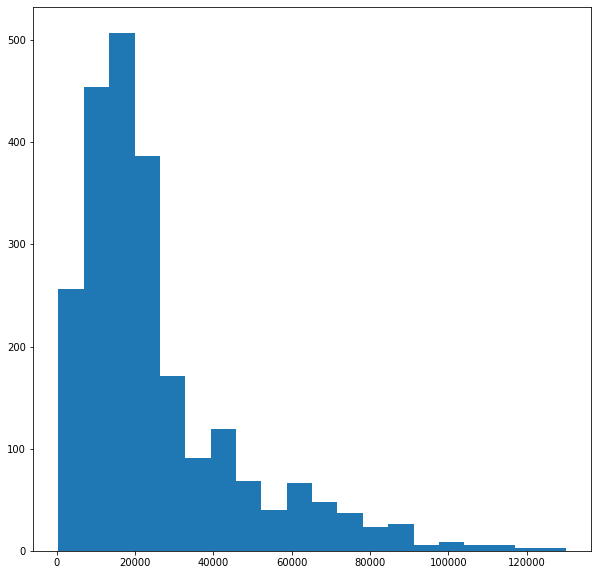

In [62]:
plt.hist(train['Price'],bins=20)
plt.show()

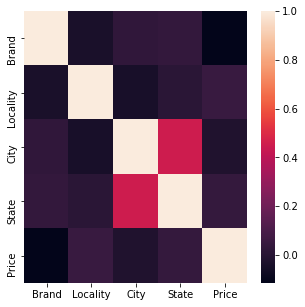

In [83]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(train.corr())
plt.show()

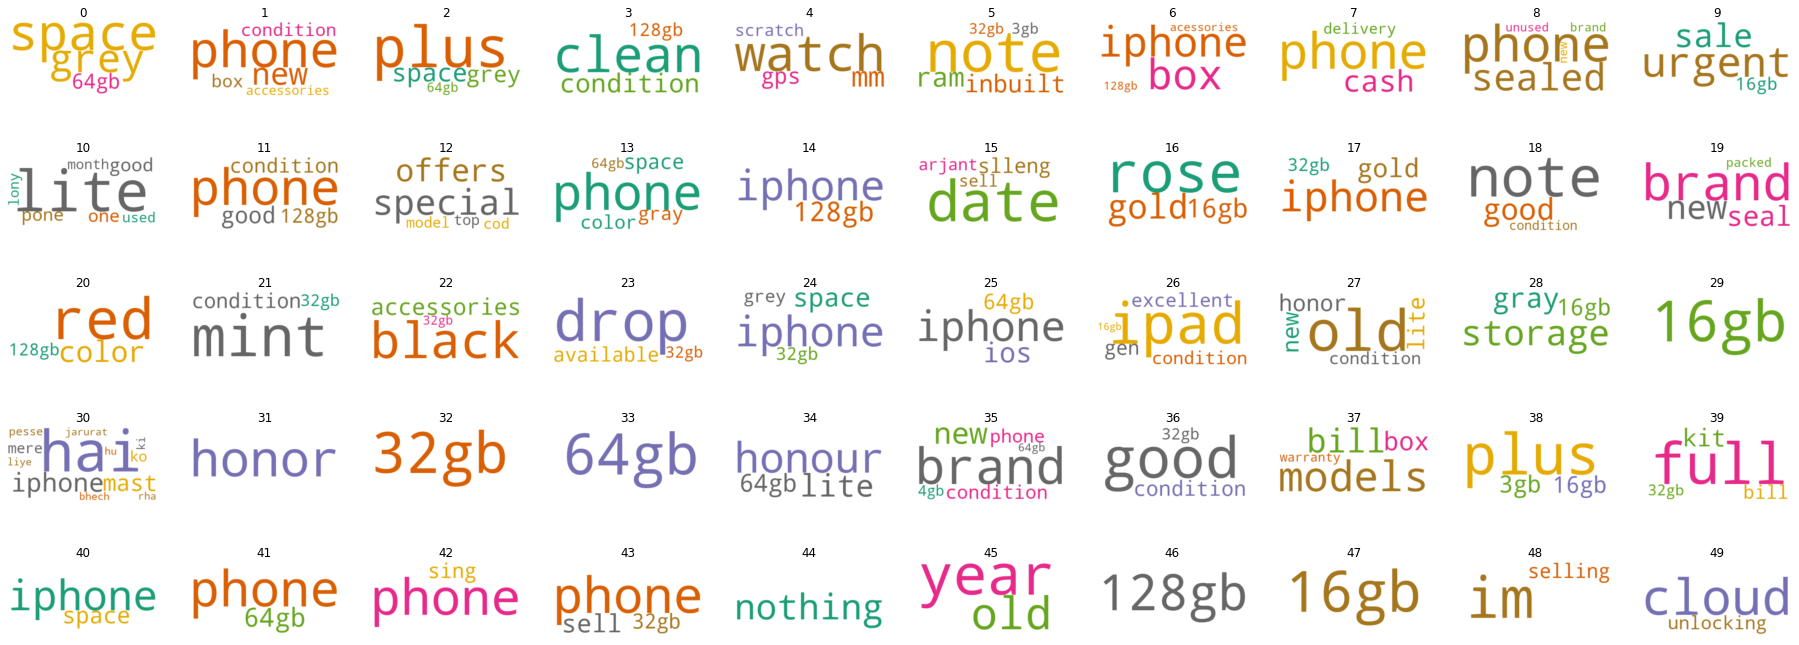

In [80]:
from wordcloud import WordCloud
wc=WordCloud(background_color='white',colormap='Dark2',max_font_size=150,random_state=42)
plt.rcParams['figure.figsize']=[32,12]
new=train.loc[train['Price']<20000,:]
new.index=range(new.shape[0])
for i in range(50):
  wc.generate(new['Model_Info_clean'][i])

  plt.subplot(5,10,i+1)
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  plt.title(i)

plt.show()